In [9]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
  
import warnings
warnings.filterwarnings('ignore')
  
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
  
import os
import matplotlib.image as mpimg
import keras.utils
from keras import utils as np_utils


In [10]:
path = r'C:\Users\disha\anaconda3\project python'
classes = os.listdir(path)
classes

['sampleSubmission.csv', 'test1', 'train']

In [11]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
  
cat_dir = os.path.join(r'project python\train')
dog_dir = os.path.join (r'project python\test1')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)
  
pic_index = 210
  
cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]
  
for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
plt.show()

<Figure size 1152x1152 with 0 Axes>

In [12]:
base_dir = r'C:\Users\disha\anaconda3\project python'
  
# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 37500 files belonging to 2 classes.
Using 33750 files for training.
Found 37500 files belonging to 2 classes.
Using 3750 files for validation.


In [13]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
  
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [7]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [9]:
history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)

Epoch 1/10
1055/1055 [==============================] - 1665s 2s/step - loss: 0.6855 - accuracy: 0.6335 - val_loss: 0.6625 - val_accuracy: 0.6432
Epoch 2/10
1055/1055 [==============================] - 1653s 2s/step - loss: 0.6513 - accuracy: 0.6552 - val_loss: 0.6591 - val_accuracy: 0.6341
Epoch 3/10
1055/1055 [==============================] - 1628s 2s/step - loss: 0.6478 - accuracy: 0.6598 - val_loss: 0.6446 - val_accuracy: 0.6661
Epoch 4/10
1055/1055 [==============================] - 1674s 2s/step - loss: 0.6466 - accuracy: 0.6607 - val_loss: 0.6906 - val_accuracy: 0.6051
Epoch 5/10
1055/1055 [==============================] - 1667s 2s/step - loss: 0.6460 - accuracy: 0.6620 - val_loss: 0.6644 - val_accuracy: 0.6200
Epoch 6/10
1055/1055 [==============================] - 1627s 2s/step - loss: 0.6457 - accuracy: 0.6617 - val_loss: 0.6411 - val_accuracy: 0.6661
Epoch 7/10
1055/1055 [==============================] - 1603s 2s/step - loss: 0.6440 - accuracy: 0.6630 - val_loss: 0.6404 -

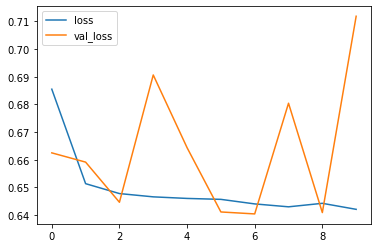

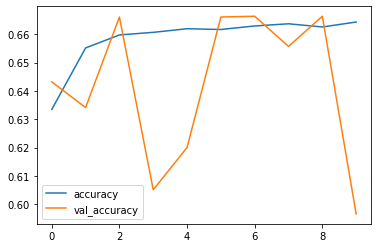

In [12]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

NameError: name 'model' is not defined

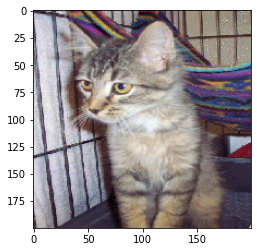

In [5]:
from tensorflow.keras.preprocessing import image
  
#Input image
test_image = image.load_img('C:\\Users\\disha\\anaconda3\\project python\\train\\train\\cat2.jpg',target_size=(200,200))
  
#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
  
# Result array
result = model.predict(test_image)
  
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

NameError: name 'model' is not defined

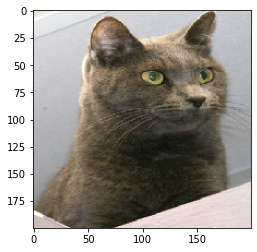

In [8]:
test_image = image.load_img('C:\\Users\\disha\\anaconda3\\project python\\test1\\test1\\11.jpg', target_size=(200, 200))
  
# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
  
# Result array
result = model.predict(test1_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
    print("Dog")
else:
    print("Cat")